In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [122]:
# Importing Dataset

df = pd.read_csv('/content/P2.TXT', sep = "--", header=None, names=["Date", "Time", "X", "Y", "Z", "Left", "Right"])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [123]:
# Cleaning column header from notebook

df['Date'] = df['Date'].str.replace(r'[Date]', '')
df['Time'] = df['Time'].str.replace(r'[Time]', '')
df['X'] = df['X'].str.replace(r'[X]', '')
df['Y'] = df['Y'].str.replace(r'[Y]', '')
df['Z'] = df['Z'].str.replace(r'[Z]', '')
df['Left'] = df['Left'].str.replace(r'[Left]', '')
df['Right'] = df['Right'].str.replace(r'[Right]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: Fu

In [124]:
# Visualizing top 5 rows from the Dataset

df.head()

,Date,Time,X,Y,Z,Left,Right
0,14.08.2022,15:23:08,0.04,10.28,0.39,432,528
1,14.08.2022,15:23:08,0.04,10.24,0.27,432,528
2,14.08.2022,15:23:08,0.08,10.28,0.39,432,528
3,14.08.2022,15:23:08,0.04,10.24,0.47,432,528
4,14.08.2022,15:23:08,0.12,10.40,0.67,432,528


# Feature engineering

In [125]:
## Merging Date & Time to create Time_Stamp
df['Time_Stamp'] = df['Date'] + ' ' + df['Time']

## Moving Time_Stamp to the beginning of the dataframe
first_column = df.pop('Time_Stamp')
df.insert(0, 'Time_Stamp', first_column)

## dropping Date & Time
df.drop(['Date','Time'], axis=1, inplace=True)

In [126]:
# Visualizing top 5 rows from the Dataset

df.head()

,Time_Stamp,X,Y,Z,Left,Right
0,14.08.2022 15:23:08,0.04,10.28,0.39,432,528
1,14.08.2022 15:23:08,0.04,10.24,0.27,432,528
2,14.08.2022 15:23:08,0.08,10.28,0.39,432,528
3,14.08.2022 15:23:08,0.04,10.24,0.47,432,528
4,14.08.2022 15:23:08,0.12,10.40,0.67,432,528


In [127]:
# Constructing a function to separate various samples from data.

Sample = 1
def Sample_Number(number):
  global Sample
  if number=='-':
    Sample = Sample + 1
    return Sample
  else:
    return Sample

In [128]:
# Adding a new column 'Sample_Number' that containing various sample numbers

df['Sample_Number']=df['X'].apply(Sample_Number)

In [129]:
# Removing all of the empty rows

df = df.dropna()

In [130]:
# Displaying dataframe

display(df)

,Time_Stamp,X,Y,Z,Left,Right,Sample_Number
0,14.08.2022 15:23:08,0.04,10.28,0.39,432,528,1
1,14.08.2022 15:23:08,0.04,10.24,0.27,432,528,1
2,14.08.2022 15:23:08,0.08,10.28,0.39,432,528,1
3,14.08.2022 15:23:08,0.04,10.24,0.47,432,528,1
4,14.08.2022 15:23:08,0.12,10.40,0.67,432,528,1
...,...,...,...,...,...,...,...
4652,14.08.2022 15:27:44,-0.08,10.12,-1.02,544,672,10
4653,14.08.2022 15:27:44,-0.16,10.43,-0.82,544,672,10
4654,14.08.2022 15:27:44,-0.16,10.20,-1.10,544,672,10
4655,14.08.2022 15:27:44,-0.08,10.16,-1.14,544,672,10


In [131]:
# Assign names to differnt samples 

RVD = df[df['Sample_Number']==1]
OVD = df[df['Sample_Number']==2]
NMO = df[df['Sample_Number']==3]
MMO = df[df['Sample_Number']==4]
MLE = df[df['Sample_Number']==5]
MAP = df[df['Sample_Number']==6]
FV = df[df['Sample_Number']==7]
SZ = df[df['Sample_Number']==8]
TH = df[df['Sample_Number']==9]
BP = df[df['Sample_Number']==10]

In [132]:
# Separating phonetic data from jaw opening data

Jaw_Opening = df[df['Sample_Number']<=6]
Phonetic = df[df['Sample_Number']>6] 

In [133]:
# Assign data types to differnt columns

df['Time_Stamp']=df['Time_Stamp'].astype('datetime64[ns]')
df['X']=df['X'].astype('float64')
df['Y']=df['Y'].astype('float64')
df['Z']=df['Z'].astype('float64')
df['Left']=df['Left'].astype('int64')
df['Right']=df['Right'].astype('int64')
df['Sample_Number']=df['Sample_Number'].astype('category')

In [134]:
# Displaying datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 0 to 4656
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Time_Stamp     4648 non-null   datetime64[ns]
 1   X              4648 non-null   float64       
 2   Y              4648 non-null   float64       
 3   Z              4648 non-null   float64       
 4   Left           4648 non-null   int64         
 5   Right          4648 non-null   int64         
 6   Sample_Number  4648 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 259.1 KB


In [135]:
# Counting each column data

df.count()

Time_Stamp       4648
X                4648
Y                4648
Z                4648
Left             4648
Right            4648
Sample_Number    4648
dtype: int64

### Assign name to differnt samples

Sample Name | Sample Number

RVD =  1

OVD = 2

NMO = 3

MMO = 4

MLE = 5

MAP = 6

FV = 7

SZ = 8

TH = 9

BP = 10

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


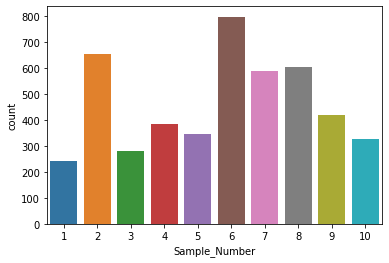

In [136]:
# Counting each sample

sns.countplot(df['Sample_Number'])

In [137]:
# Jaw_Opening data count

Jaw_Opening.count()

Time_Stamp       2708
X                2708
Y                2708
Z                2708
Left             2708
Right            2708
Sample_Number    2708
dtype: int64

In [138]:
# Phonetic data count

Phonetic.count()

Time_Stamp       1940
X                1940
Y                1940
Z                1940
Left             1940
Right            1940
Sample_Number    1940
dtype: int64

In [139]:
# Showing total seconds of data reading for Jaw_Opening

Jaw_Opening[['Time_Stamp']] = Jaw_Opening[['Time_Stamp']].apply(pd.to_datetime)
result = (Jaw_Opening['Time_Stamp'].max() - Jaw_Opening['Time_Stamp'].min()).total_seconds()
print("Total seconds of data reading for Jaw_Opening: ", result, "Seconds") 
print()

Total seconds of data reading for Jaw_Opening:  146.0 Seconds



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [140]:
# Showing total seconds of data reading for Phonetic

Phonetic[['Time_Stamp']] = Phonetic[['Time_Stamp']].apply(pd.to_datetime)
result = (Phonetic['Time_Stamp'].max() - Phonetic['Time_Stamp'].min()).total_seconds()
print("Total seconds of data reading for Phonetic: ", result, "Seconds") 
print()

Total seconds of data reading for Phonetic:  89.0 Seconds



# Statistical analysis of each sample

In [141]:
# RVD

print("Left minimum: ", RVD['Left'].min())
print()
print("Left median: ", RVD['Left'].median())
print()
print("Left mode: ", RVD['Left'].mode())
print()
print("Left maximum: ", RVD['Left'].max())

print()
print('------' * 10)
print()

print("Right minimum: ", RVD['Right'].min())
print()
print("Right median: ", RVD['Right'].median())
print()
print("Right mode: ", RVD['Right'].mode())
print()
print("Right maximum: ", RVD['Right'].max())

print()
print('------' * 10)
print()

print("X maximum: ", RVD['X'].max())
print()
print("X minimum: ", RVD['X'].min())

print()
print('------' * 10)
print()

print("Y maximum: ", RVD['Y'].max())
print("Y minimum: ", RVD['Y'].min())

print()
print('------' * 10)
print()

print("Z maximum: ", RVD['Z'].max())
print()
print("Z minimum: ", RVD['Z'].min())

Left minimum:     432  

Left median:  432.0

Left mode:  0       432  
dtype: object

Left maximum:     448  

------------------------------------------------------------

Right minimum:     528

Right median:  528.0

Right mode:  0       528
dtype: object

Right maximum:     528

------------------------------------------------------------

X maximum:     0.51  

X minimum:     -0.04  

------------------------------------------------------------

Y maximum:     9.96  
Y minimum:     10.00  

------------------------------------------------------------

Z maximum:     2.12  

Z minimum:     -0.04  


In [142]:
# OVD

print("Left minimum: ", OVD['Left'].min())
print()
print("Left median: ", OVD['Left'].median())
print()
print("Left mode: ", OVD['Left'].mode())
print()
print("Left maximum: ", OVD['Left'].max())

print()
print('------' * 10)
print()

print("Right minimum: ", OVD['Right'].min())
print()
print("Right median: ", OVD['Right'].median())
print()
print("Right mode: ", OVD['Right'].mode())
print()
print("Right maximum: ", OVD['Right'].max())

print()
print('------' * 10)
print()

print("X maximum: ", OVD['X'].max())
print()
print("X minimum: ", OVD['X'].min())

print()
print('------' * 10)
print()

print("Y maximum: ", OVD['Y'].max())
print("Y minimum: ", OVD['Y'].min())

print()
print('------' * 10)
print()

print("Z maximum: ", OVD['Z'].max())
print()
print("Z minimum: ", OVD['Z'].min())

Left minimum:     448  

Left median:  448.0

Left mode:  0       448  
dtype: object

Left maximum:     448  

------------------------------------------------------------

Right minimum:     528

Right median:  528.0

Right mode:  0       528
dtype: object

Right maximum:     528

------------------------------------------------------------

X maximum:     0.90  

X minimum:     -0.04  

------------------------------------------------------------

Y maximum:     9.96  
Y minimum:     10.00  

------------------------------------------------------------

Z maximum:     2.12  

Z minimum:     -0.04  


In [143]:
# NMO

print("Left minimum: ", NMO['Left'].min())
print()
print("Left median: ", NMO['Left'].median())
print()
print("Left mode: ", NMO['Left'].mode())
print()
print("Left maximum: ", NMO['Left'].max())

print()
print('------' * 10)
print()

print("Right minimum: ", NMO['Right'].min())
print()
print("Right median: ", NMO['Right'].median())
print()
print("Right mode: ", NMO['Right'].mode())
print()
print("Right maximum: ", NMO['Right'].max())

print()
print('------' * 10)
print()

print("X maximum: ", NMO['X'].max())
print()
print("X minimum: ", NMO['X'].min())

print()
print('------' * 10)
print()

print("Y maximum: ", NMO['Y'].max())
print("Y minimum: ", NMO['Y'].min())

print()
print('------' * 10)
print()

print("Z maximum: ", NMO['Z'].max())
print()
print("Z minimum: ", NMO['Z'].min())

Left minimum:     1008  

Left median:  560.0

Left mode:  0       528  
dtype: object

Left maximum:     992  

------------------------------------------------------------

Right minimum:     1008

Right median:  688.0

Right mode:  0       688
dtype: object

Right maximum:     992

------------------------------------------------------------

X maximum:     1.10  

X minimum:     -0.04  

------------------------------------------------------------

Y maximum:     9.92  
Y minimum:     10.00  

------------------------------------------------------------

Z maximum:     2.12  

Z minimum:     -0.04  


In [144]:
# MMO

print("Left minimum: ", MMO['Left'].min())
print()
print("Left median: ", MMO['Left'].median())
print()
print("Left mode: ", MMO['Left'].mode())
print()
print("Left maximum: ", MMO['Left'].max())

print()
print('------' * 10)
print()

print("Right minimum: ", MMO['Right'].min())
print()
print("Right median: ", MMO['Right'].median())
print()
print("Right mode: ", MMO['Right'].mode())
print()
print("Right maximum: ", MMO['Right'].max())

print()
print('------' * 10)
print()

print("X maximum: ", MMO['X'].max())
print()
print("X minimum: ", MMO['X'].min())

print()
print('------' * 10)
print()

print("Y maximum: ", MMO['Y'].max())
print("Y minimum: ", MMO['Y'].min())

print()
print('------' * 10)
print()

print("Z maximum: ", MMO['Z'].max())
print()
print("Z minimum: ", MMO['Z'].min())

Left minimum:     1024  

Left median:  1256.0

Left mode:  0       512  
dtype: object

Left maximum:     976  

------------------------------------------------------------

Right minimum:     1008

Right median:  1344.0

Right mode:  0       688
dtype: object

Right maximum:     976

------------------------------------------------------------

X maximum:     1.96  

X minimum:     -0.04  

------------------------------------------------------------

Y maximum:     9.96  
Y minimum:     10.00  

------------------------------------------------------------

Z maximum:     2.47  

Z minimum:     -0.04  


In [145]:
# MLE

print("Left minimum: ", MLE['Left'].min())
print()
print("Left median: ", MLE['Left'].median())
print()
print("Left mode: ", MLE['Left'].mode())
print()
print("Left maximum: ", MLE['Left'].max())

print()
print('------' * 10)
print()

print("Right minimum: ", MLE['Right'].min())
print()
print("Right median: ", MLE['Right'].median())
print()
print("Right mode: ", MLE['Right'].mode())
print()
print("Right maximum: ", MLE['Right'].max())

print()
print('------' * 10)
print()

print("X maximum: ", MLE['X'].max())
print()
print("X minimum: ", MLE['X'].min())

print()
print('------' * 10)
print()

print("Y maximum: ", MLE['Y'].max())
print("Y minimum: ", MLE['Y'].min())

print()
print('------' * 10)
print()

print("Z maximum: ", MLE['Z'].max())
print()
print("Z minimum: ", MLE['Z'].min())

Left minimum:     1008  

Left median:  864.0

Left mode:  0       928  
dtype: object

Left maximum:     960  

------------------------------------------------------------

Right minimum:     1024

Right median:  944.0

Right mode:  0       864
dtype: object

Right maximum:     976

------------------------------------------------------------

X maximum:     2.35  

X minimum:     -0.04  

------------------------------------------------------------

Y maximum:     9.96  
Y minimum:     10.00  

------------------------------------------------------------

Z maximum:     2.12  

Z minimum:     -0.04  


In [146]:
# MAP

print("Left minimum: ", MAP['Left'].min())
print()
print("Left median: ", MAP['Left'].median())
print()
print("Left mode: ", MAP['Left'].mode())
print()
print("Left maximum: ", MAP['Left'].max())

print()
print('------' * 10)
print()

print("Right minimum: ", MAP['Right'].min())
print()
print("Right median: ", MAP['Right'].median())
print()
print("Right mode: ", MAP['Right'].mode())
print()
print("Right maximum: ", MAP['Right'].max())

print()
print('------' * 10)
print()

print("X maximum: ", MAP['X'].max())
print()
print("X minimum: ", MAP['X'].min())

print()
print('------' * 10)
print()

print("Y maximum: ", MAP['Y'].max())
print("Y minimum: ", MAP['Y'].min())

print()
print('------' * 10)
print()

print("Z maximum: ", MAP['Z'].max())
print()
print("Z minimum: ", MAP['Z'].min())

Left minimum:     1040  

Left median:  592.0

Left mode:  0       592  
dtype: object

Left maximum:     976  

------------------------------------------------------------

Right minimum:     1024

Right median:  720.0

Right mode:  0       400
dtype: object

Right maximum:     976

------------------------------------------------------------

X maximum:     1.96  

X minimum:     -0.04  

------------------------------------------------------------

Y maximum:     9.96  
Y minimum:     10.00  

------------------------------------------------------------

Z maximum:     4.51  

Z minimum:     -0.04  


In [147]:
# FV

print("Left minimum: ", FV['Left'].min())
print()
print("Left median: ", FV['Left'].median())
print()
print("Left mode: ", FV['Left'].mode())
print()
print("Left maximum: ", FV['Left'].max())

print()
print('------' * 10)
print()

print("Right minimum: ", FV['Right'].min())
print()
print("Right median: ", FV['Right'].median())
print()
print("Right mode: ", FV['Right'].mode())
print()
print("Right maximum: ", FV['Right'].max())

print()
print('------' * 10)
print()

print("X maximum: ", FV['X'].max())
print()
print("X minimum: ", FV['X'].min())

print()
print('------' * 10)
print()

print("Y maximum: ", FV['Y'].max())
print("Y minimum: ", FV['Y'].min())

print()
print('------' * 10)
print()

print("Z maximum: ", FV['Z'].max())
print()
print("Z minimum: ", FV['Z'].min())

Left minimum:     416  

Left median:  512.0

Left mode:  0       512  
dtype: object

Left maximum:     512  

------------------------------------------------------------

Right minimum:     448

Right median:  640.0

Right mode:  0       640
dtype: object

Right maximum:     656

------------------------------------------------------------

X maximum:     1.96  

X minimum:     -0.04  

------------------------------------------------------------

Y maximum:     9.96  
Y minimum:     10.00  

------------------------------------------------------------

Z maximum:     2.12  

Z minimum:     -0.35  


In [148]:
# SZ

print("Left minimum: ", SZ['Left'].min())
print()
print("Left median: ", SZ['Left'].median())
print()
print("Left mode: ", SZ['Left'].mode())
print()
print("Left maximum: ", SZ['Left'].max())

print()
print('------' * 10)
print()

print("Right minimum: ", SZ['Right'].min())
print()
print("Right median: ", SZ['Right'].median())
print()
print("Right mode: ", SZ['Right'].mode())
print()
print("Right maximum: ", SZ['Right'].max())

print()
print('------' * 10)
print()

print("X maximum: ", SZ['X'].max())
print()
print("X minimum: ", SZ['X'].min())

print()
print('------' * 10)
print()

print("Y maximum: ", SZ['Y'].max())
print("Y minimum: ", SZ['Y'].min())

print()
print('------' * 10)
print()

print("Z maximum: ", SZ['Z'].max())
print()
print("Z minimum: ", SZ['Z'].min())

Left minimum:     480  

Left median:  480.0

Left mode:  0       480  
dtype: object

Left maximum:     480  

------------------------------------------------------------

Right minimum:     624

Right median:  624.0

Right mode:  0       624
dtype: object

Right maximum:     624

------------------------------------------------------------

X maximum:     1.96  

X minimum:     -0.04  

------------------------------------------------------------

Y maximum:     9.96  
Y minimum:     10.00  

------------------------------------------------------------

Z maximum:     2.12  

Z minimum:     -0.04  


In [149]:
# TH

print("Left minimum: ", TH['Left'].min())
print()
print("Left median: ", TH['Left'].median())
print()
print("Left mode: ", TH['Left'].mode())
print()
print("Left maximum: ", TH['Left'].max())

print()
print('------' * 10)
print()

print("Right minimum: ", TH['Right'].min())
print()
print("Right median: ", TH['Right'].median())
print()
print("Right mode: ", TH['Right'].mode())
print()
print("Right maximum: ", TH['Right'].max())

print()
print('------' * 10)
print()

print("X maximum: ", TH['X'].max())
print()
print("X minimum: ", TH['X'].min())

print()
print('------' * 10)
print()

print("Y maximum: ", TH['Y'].max())
print("Y minimum: ", TH['Y'].min())

print()
print('------' * 10)
print()

print("Z maximum: ", TH['Z'].max())
print()
print("Z minimum: ", TH['Z'].min())

Left minimum:     480  

Left median:  480.0

Left mode:  0       480  
dtype: object

Left maximum:     480  

------------------------------------------------------------

Right minimum:     624

Right median:  624.0

Right mode:  0       624
dtype: object

Right maximum:     624

------------------------------------------------------------

X maximum:     1.96  

X minimum:     -0.04  

------------------------------------------------------------

Y maximum:     9.96  
Y minimum:     10.00  

------------------------------------------------------------

Z maximum:     2.12  

Z minimum:     -2.16  


In [150]:
# BP

print("Left minimum: ",  BP['Left'].min())
print()
print("Left median: ",  BP['Left'].median())
print()
print("Left mode: ",  BP['Left'].mode())
print()
print("Left maximum: ",  BP['Left'].max())

print()
print('------' * 10)
print()

print("Right minimum: ",  BP['Right'].min())
print()
print("Right median: ",  BP['Right'].median())
print()
print("Right mode: ",  BP['Right'].mode())
print()
print("Right maximum: ",  BP['Right'].max())

print()
print('------' * 10)
print()

print("X maximum: ",  BP['X'].max())
print()
print("X minimum: ",  BP['X'].min())

print()
print('------' * 10)
print()

print("Y maximum: ",  BP['Y'].max())
print("Y minimum: ",  BP['Y'].min())

print()
print('------' * 10)
print()

print("Z maximum: ",  BP['Z'].max())
print()
print("Z minimum: ",  BP['Z'].min())

Left minimum:     544  

Left median:  544.0

Left mode:  0       544  
dtype: object

Left maximum:     544  

------------------------------------------------------------

Right minimum:     672

Right median:  688.0

Right mode:  0       688
dtype: object

Right maximum:     688

------------------------------------------------------------

X maximum:     1.96  

X minimum:     -0.04  

------------------------------------------------------------

Y maximum:     9.96  
Y minimum:     10.00  

------------------------------------------------------------

Z maximum:     2.12  

Z minimum:     -0.08  
